# Genetic Algorithm Optimize Posting Time

In [2]:
# Import Libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# Simulate engagement score (hour 0-23)
hours = np.arange(24)
true_engagement = lambda h: 50 + 40 * np.sin((h - 9) * np.pi / 12) + np.random.normal(0, 5)
engagement_scores = np.array([true_engagement(h) for h in hours])

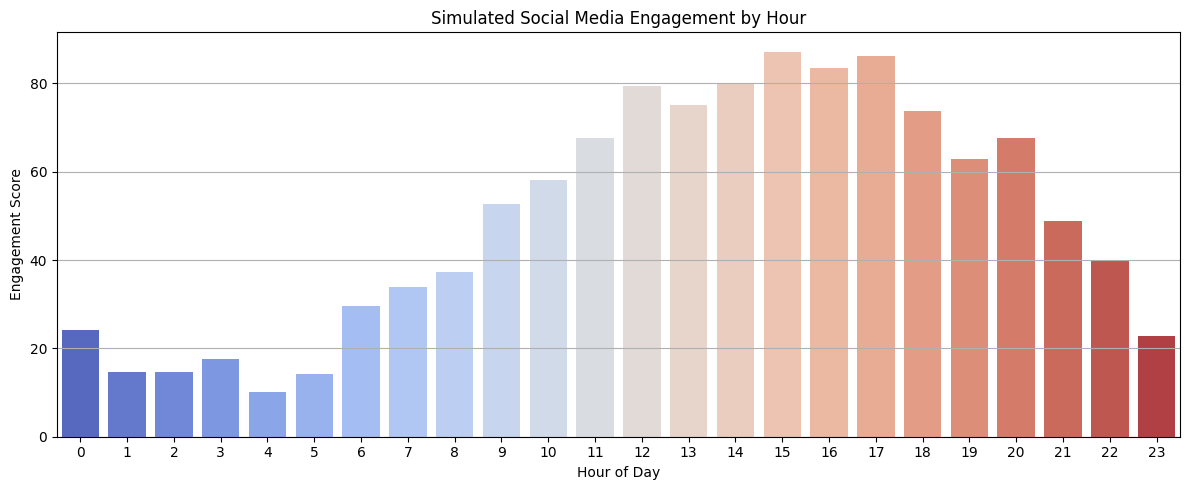

In [4]:
# Visualize
plt.figure(figsize=(12, 5))
sns.barplot(x=hours, y=engagement_scores, palette="coolwarm")
plt.title("Simulated Social Media Engagement by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Engagement Score")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

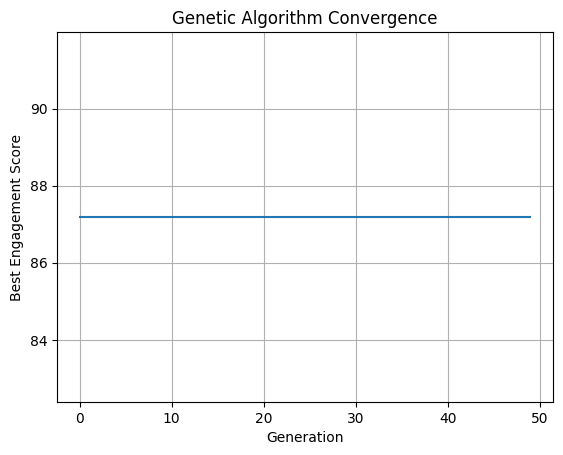

Optimal hour to post: 15:00


In [5]:
# Genetic Algorithm to find best posting hour
def fitness(hour):
    return -engagement_scores[int(hour) % 24]  # Maximize engagement

def select(pop, scores, k=3):
    selected = np.random.choice(len(pop), k)
    return pop[selected[np.argmin(scores[selected])]]

def crossover(p1, p2):
    return (p1 + p2) / 2

def mutate(child, mutation_rate=0.1):
    if np.random.rand() < mutation_rate:
        return child + np.random.uniform(-1, 1)
    return child

def run_ga(n_gen=50, pop_size=30):
    pop = np.random.uniform(0, 23, pop_size)
    history = []

    for _ in range(n_gen):
        scores = np.array([fitness(x) for x in pop])
        best = pop[np.argmin(scores)]
        history.append(-fitness(best))
        new_pop = []
        for _ in range(pop_size):
            p1 = select(pop, scores)
            p2 = select(pop, scores)
            child = crossover(p1, p2)
            child = mutate(child)
            new_pop.append(child)
        pop = np.clip(new_pop, 0, 23)

    return history, best

history, best_hour = run_ga()
plt.plot(history)
plt.title("Genetic Algorithm Convergence")
plt.xlabel("Generation")
plt.ylabel("Best Engagement Score")
plt.grid(True)
plt.show()

print(f"Optimal hour to post: {int(best_hour)}:00")